<a href="https://colab.research.google.com/github/unanida/IT-BI2022/blob/main/ITB_%EA%B0%9C%EC%9D%B8%EA%B3%BC%EC%A0%9C2_kyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 탐색**

In [8]:
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl               
import matplotlib.pyplot as plt        
import matplotlib.font_manager as fm

df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/health_data.csv')
df

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


In [12]:
df_cal_bmi = df[['체중(5Kg 단위)','신장(5Cm단위)']]
df_cal_bmi.columns = ['weight','height']
bmi = df_cal_bmi.weight / ((df_cal_bmi.height/100) * (df_cal_bmi.height/100))

bmi

0       22.038567
1       28.888889
2       22.892820
3       27.343750
4       20.811655
          ...    
9995    22.892820
9996    21.484375
9997    31.250000
9998    22.892820
9999    29.296875
Length: 10000, dtype: float64

**개인과제2: 분류과제:  각 신체 데이터별 BMI에 영향을 끼치는 정도**

In [13]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import mglearn

In [16]:
%matplotlib inline
import pandas as pd
import seaborn as sns           # Seaborn 로딩하기
import matplotlib.pyplot as plt # Matplotlib의 pyplot 로딩하기

In [17]:
health = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/health_data.csv")

print(health.columns)
display(health.info())      # 569행의 데이터 - id는 index이므로 생략됨, diagnosis와 30개 변수 (결측치 없음)  
display(health.head())

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)   

None

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [18]:
health.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


No        6231
NotNow    1926
Yes       1841
Name: 흡연상태, dtype: int64


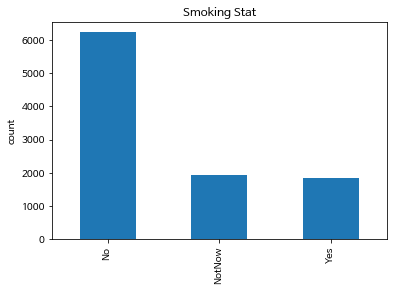

In [19]:
print(health['흡연상태'].value_counts())

health['흡연상태'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Smoking Stat')
plt.show()

In [20]:
#파생변수 생성 
health['BMI'] = round(health['체중(5Kg 단위)']/(health['신장(5Cm단위)']/100)**2, 1) 
health.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,BMI
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.9
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.9
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.3
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.8


In [21]:
health['비만여부'] = health['BMI'].apply(lambda x : 'Yes' if x >= 25 else 'No' )
health.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,BMI,비만여부
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,27.0,21.0,No,No,0,NaN,NaN,12/29/2021,22.0,No
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,15.0,15.0,No,No,0,NaN,NaN,12/29/2021,28.9,Yes
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,25.0,7.0,No,No,0,NaN,NaN,12/29/2021,22.9,No
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,97.0,72.0,No,No,1,0.0,0.0,12/29/2021,27.3,Yes
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,17.0,14.0,No,No,0,NaN,NaN,12/29/2021,20.8,No


No     5944
Yes    4056
Name: 비만여부, dtype: int64


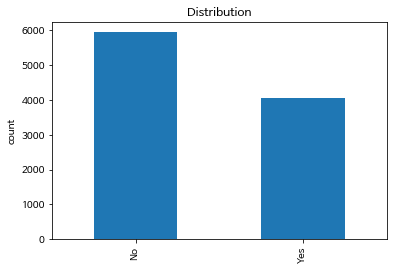

In [22]:
print(health['비만여부'].value_counts())

health['비만여부'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Distribution')
plt.show()

In [23]:
Xy= health[['비만여부', '성별코드', '흡연상태', '음주여부' ]]
Xy.head()

,비만여부,성별코드,흡연상태,음주여부
0,No,M,No,No
1,Yes,F,No,No
2,No,F,No,No
3,Yes,M,No,No
4,No,F,No,No


In [24]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import mglearn

In [27]:
import sys
!{sys.executable} -m pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **개인과제2: 분류과제: 흡연 여부와 성별이 비만여부에 미치는 영향**



In [28]:
print(Xy.shape)
print(Xy.isnull().sum())

(10000, 4)
비만여부    0
성별코드    0
흡연상태    2
음주여부    1
dtype: int64


In [29]:
Xy_new = Xy.dropna(axis = 0) # NA 삭제 #axos =0 은 행을 다 삭제해 준 것.
print(Xy_new.shape) #.shape 하면 행과 열을 보여줌.
print(Xy_new.isnull().sum())

(9997, 4)
비만여부    0
성별코드    0
흡연상태    0
음주여부    0
dtype: int64


In [30]:
Xy_new.describe()

,비만여부,성별코드,흡연상태,음주여부
count,9997,9997,9997,9997
unique,2,2,3,2
top,No,M,No,Yes
freq,5941,5137,6230,5817


In [31]:
X =  Xy_new.iloc[:, 1:]   # iloc으로 
display(X.head())

y = Xy_new.iloc[:, 0]
#y = Xy['비만여부'] 
display(y.head())

,성별코드,흡연상태,음주여부
0,M,No,No
1,F,No,No
2,F,No,No
3,M,No,No
4,F,No,No


0     No
1    Yes
2     No
3    Yes
4     No
Name: 비만여부, dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder
cols = ['비만여부', '성별코드', '음주여부', '흡연상태'] # 유효한 이 세 개를 수치형 변수로 바꾸려고 함.
Xy_new[cols] = Xy_new[cols].apply(LabelEncoder().fit_transform)
Xy_new.head() 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,비만여부,성별코드,흡연상태,음주여부
0,0,1,0,0
1,1,0,0,0
2,0,0,0,0
3,1,1,0,0
4,0,0,0,0


In [33]:
X =  Xy_new.iloc[:, 1:]   # iloc으로 
display(X.head())

y = Xy_new.iloc[:, 0]
#y = Xy['비만여부'] 
display(y.head())

,성별코드,흡연상태,음주여부
0,1,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,0


0    0
1    1
2    0
3    1
4    0
Name: 비만여부, dtype: int64

# **의사결정나무 모델**

In [34]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(max_depth =4, random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.603
시험용 데이터 정확도: 0.595


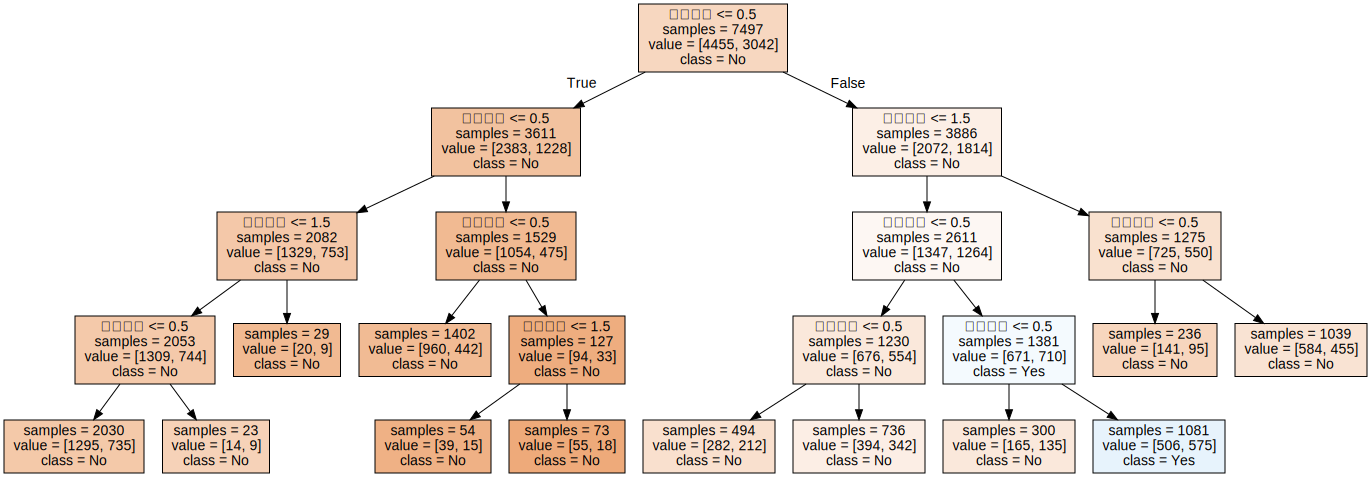

In [35]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["No", "Yes"],
                feature_names=X.columns, impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# **의사결정 나무 모델 해석**


> 들여쓴



**한글 깨짐 방지**

In [36]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 비만에 영향을 미치는 주요 요인 분석

In [37]:
result = tree.feature_importances_
print("비만에 영향을 미치는 요인:\n", result)

비만에 영향을 미치는 요인:
 [0.7505466  0.13751646 0.11193694]


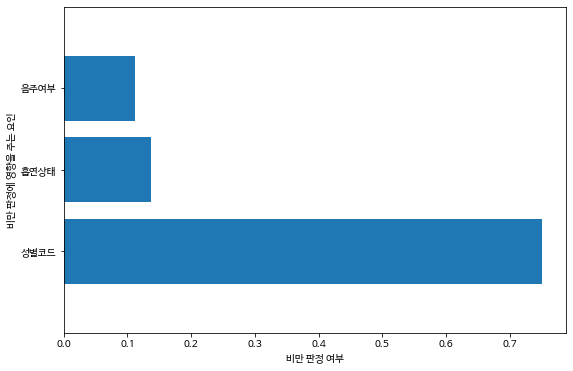

In [44]:
import numpy as np

def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(X.columns)  # X.columns의 개수 len으로
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns)  # X.columns의 개수 len으로 이곳 두 개만 바꿔주기
    plt.xlabel("비만 판정 여부")
    plt.ylabel("비만 판정에 영향을 주는 요인")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances(tree)

# **결과해석**


> 비만 판정에 영향을 주는 요인으로는 성별, 흡연 사태, 음주 여부 순으로 영향을 미쳤다. 대체적으로 남성의 경우가 비만일 확률이 더 높았으며, 흡연을 하지 않는 남성의 비만율이 더 높았다. 여성의 경우 음주를 할 경우 비만이 확률이 더 높았다.



# 랜덤 포레스트 모델

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.603
시험용 데이터 세트 정확도: 0.595


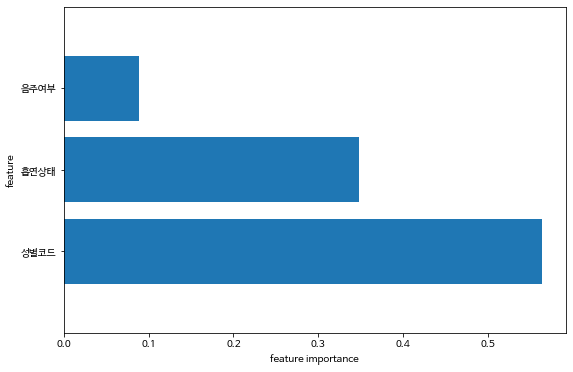

In [40]:
plot_feature_importances(forest)

# **결과해석_랜덤포레스트**


> 랜덤 포레스트 모델의 경우에는 흡연상태의 영향이 더 크다고 분석했다.



# 그래디언트 부스팅 모델

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, random_state=0)

In [42]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.603
시험용 데이터 세트 정확도: 0.595


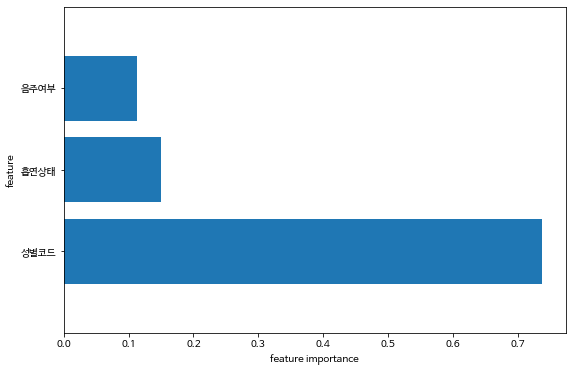

In [43]:
plot_feature_importances(gbrt)

# **결과해석_그래디언트 부스팅**


> 랜덤 포레스트 모델의 경우에도 역시 성별, 흡연 상태, 음주 여부 순으로 비만 판정에 영향을 준다고 해석할 수 있고, 의사결정나무 모델과 유사한 결과를 보였다.

# **분류모델 평가**

**교차 검증**

In [45]:
from sklearn.model_selection import cross_val_score
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation), default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy mean
Decision tree :0.603
Random forest :0.603
Gradient boosting :0.603


**그리드 서치**

In [47]:
from sklearn.model_selection import GridSearchCV

# 파라미터를 dictionary 형태로 설정
parameters1 = {'max_depth':[4, 5]}
parameters2 = {'max_depth':[4, 5], 'n_estimators':[80, 90, 100]}
parameters3 = {'max_depth':[4, 5], 'learning_rate':[0.1,0.08]}

In [48]:
grid_tree = GridSearchCV(tree, param_grid=parameters1, cv=5, refit=True)
grid_tree.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_tree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_tree.best_score_))

grid_forest = GridSearchCV(forest, param_grid=parameters2, cv=5, refit=True)
grid_forest.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_forest.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_forest.best_score_))

grid_gbrt = GridSearchCV(gbrt, param_grid=parameters3, cv=5, refit=True)
grid_gbrt.fit(X_train, y_train)

print('GridSearchCV 최적 파라미터:', grid_gbrt.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_gbrt.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 4}
GridSearchCV 최고 정확도: 0.6034
GridSearchCV 최적 파라미터: {'max_depth': 4, 'n_estimators': 80}
GridSearchCV 최고 정확도: 0.6034
GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'max_depth': 4}
GridSearchCV 최고 정확도: 0.6034


In [49]:
print("tree: 시험용 데이터 세트 정확도: {:.3f}".format(grid_tree.score(X_test, y_test)))
print("forest: 시험용 데이터 세트 정확도: {:.3f}".format(grid_forest.score(X_test, y_test)))
print("gbrt: 시험용 데이터 세트 정확도: {:.3f}".format(grid_gbrt.score(X_test, y_test)))

tree: 시험용 데이터 세트 정확도: 0.595
forest: 시험용 데이터 세트 정확도: 0.595
gbrt: 시험용 데이터 세트 정확도: 0.595


# **모델 평가**

**정오 분류표**

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

dt_pred = grid_tree.predict(X_test)
forest_pred= grid_forest.predict(X_test) # 가장 최적의 파라미터를 사용했던 모델들을 가져옴
gbrt_pred = grid_gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, forest_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

Decision tree 시험용 데이터 세트 정확도:0.595
[[1314  172]
 [ 841  173]]
Random forest 시험용 데이터 세트 정확도:0.595
[[1314  172]
 [ 841  173]]
Gradient boosting 시험용 데이터 세트 정확도:0.595
[[1314  172]
 [ 841  173]]


In [55]:
print("Decision tree")
print('정밀도:{:.3f}'.format(precision_score (y_test, dt_pred, average='binary', pos_label= 1)))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y_test, dt_pred, average='binary', pos_label= 1)))
print('f1-measure:{:.3f}'.format(f1_score(y_test, dt_pred, average='binary', pos_label= 1)))

print("Random forest")
print('정밀도:{:.3f}'.format(precision_score (y_test, forest_pred, average='binary', pos_label= 1)))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y_test, forest_pred, average='binary', pos_label=1)))
print('f1-measure:{:.3f}'.format(f1_score(y_test, forest_pred, average='binary', pos_label=1)))

print("Gradienc boosting")
print('정밀도:{:.3f}'.format(precision_score (y_test, gbrt_pred, average='binary', pos_label=1)))  # pos_label = 1 기본값
print('재현율:{:.3f}'.format(recall_score(y_test, gbrt_pred, average='binary', pos_label=1)))
print('f1-measure:{:.3f}'.format(f1_score(y_test, gbrt_pred, average='binary', pos_label=1)))



Decision tree
정밀도:0.501
재현율:0.171
f1-measure:0.255
Random forest
정밀도:0.501
재현율:0.171
f1-measure:0.255
Gradienc boosting
정밀도:0.501
재현율:0.171
f1-measure:0.255
